### 중심극한정리
* 모집단의 분포가 어떻든, 표본평균의 분포는 정규분포에 가까워진다
* 조건: 표본 크기가 충분히 클때 (보통 n ≥ 30)

### 왜 중요한가?
* 모집단의 분포를 몰라도 추론 가능
* 신뢰구간, 가설검정의 이론적 기반
* 실무에서 가장 많이 활용되는 개념

### 수식
* 모집단: 평균 μ, 분산 σ²
* 표본평균 X̄의 분포: N(μ, σ²/n)
* 표본 크기 n이 클수록 분산 감소!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

import matplotlib as mpl

# 한글 폰트 설정 (선택사항)
mpl.rcParams['font.family'] = 'AppleGothic'
mpl.rcParams['axes.unicode_minus'] = False

=== 중심극한정리: 균등분포 ===


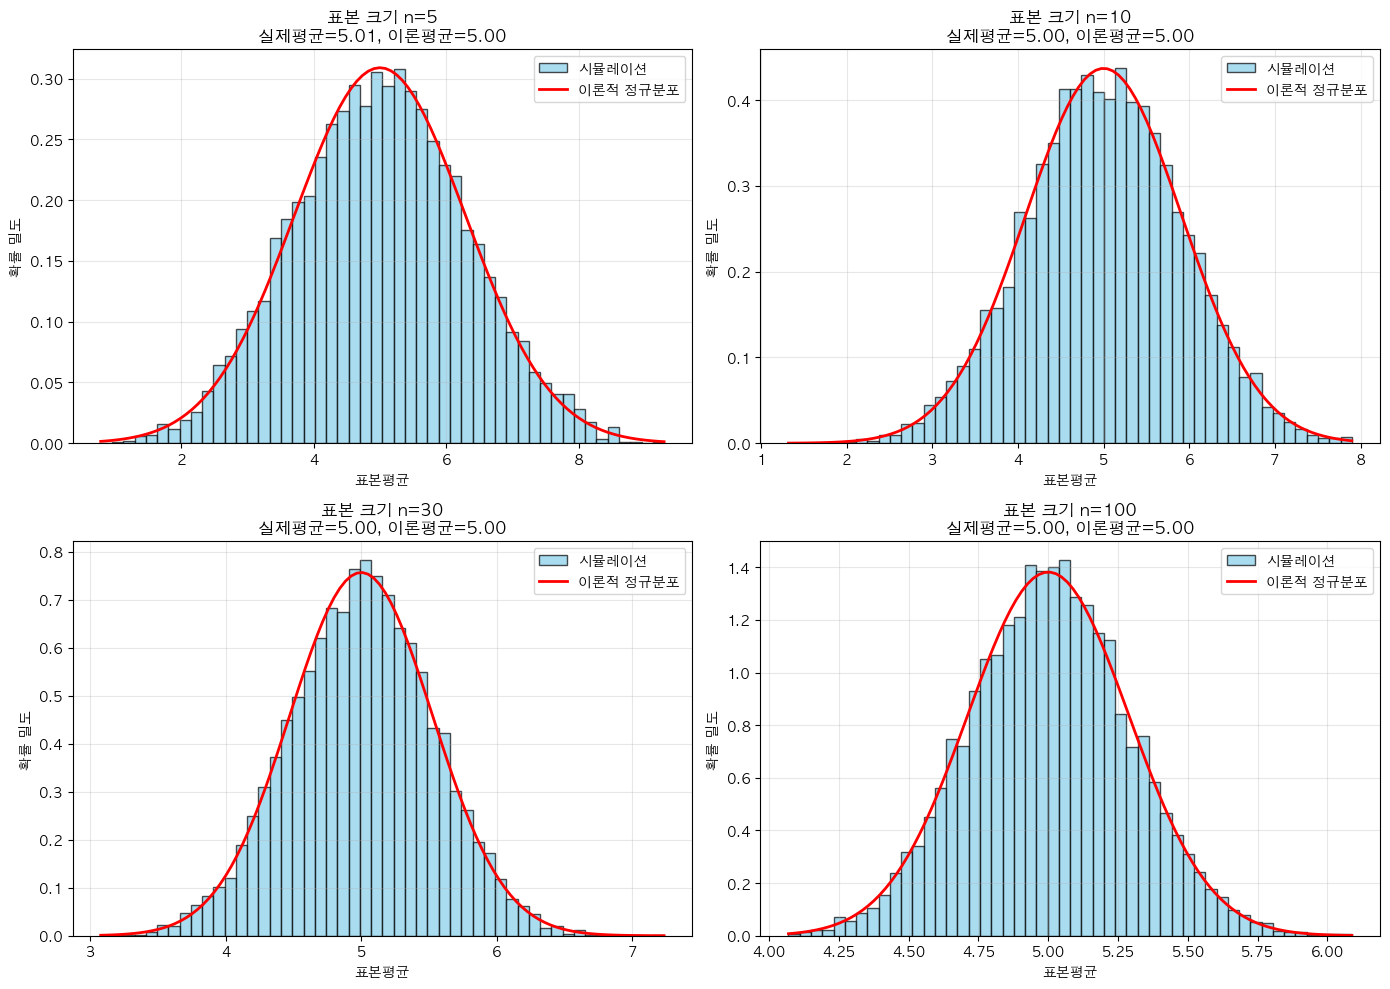

In [2]:
# 1. 중심극한정리 시뮬레이션 - 균등분포
print("=== 중심극한정리: 균등분포 ===")

# 모집단: 균등분포 U(0, 10)
population = stats.uniform(0, 10)

sample_sizes = [5, 10, 30, 100]
n_simulations = 10000

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for idx, n in enumerate(sample_sizes):
    ax = axes[idx // 2, idx % 2]

    # n개씩 샘플링하여 평균 계산을 10000번 반복
    sample_means = []
    for _ in range(n_simulations):
        # 모집단(균등분포)에서 n개의 샘플을 무작위로 추출
        sample = population.rvs(size=n)
        
        sample_means.append(np.mean(sample))

    sample_means = np.array(sample_means)

    # 히스토그램
    ax.hist(sample_means, bins=50, alpha=0.7, color='skyblue',
            edgecolor='black', density=True, label='시뮬레이션')

    # 이론적 정규분포 (중심극한정리)
    mu = 5  # 균등분포의 평균
    sigma = np.sqrt(100/12)  # 균등분포의 표준편차
    se = sigma / np.sqrt(n)  # 표준오차

    x = np.linspace(sample_means.min(), sample_means.max(), 100)
    theoretical = stats.norm(mu, se).pdf(x)
    ax.plot(x, theoretical, 'r-', linewidth=2, label='이론적 정규분포')

    ax.set_xlabel('표본평균')
    ax.set_ylabel('확률 밀도')
    ax.set_title(f'표본 크기 n={n}\n실제평균={sample_means.mean():.2f}, 이론평균={mu:.2f}')
    ax.legend()
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()


=== 중심극한정리: 지수분포 ===


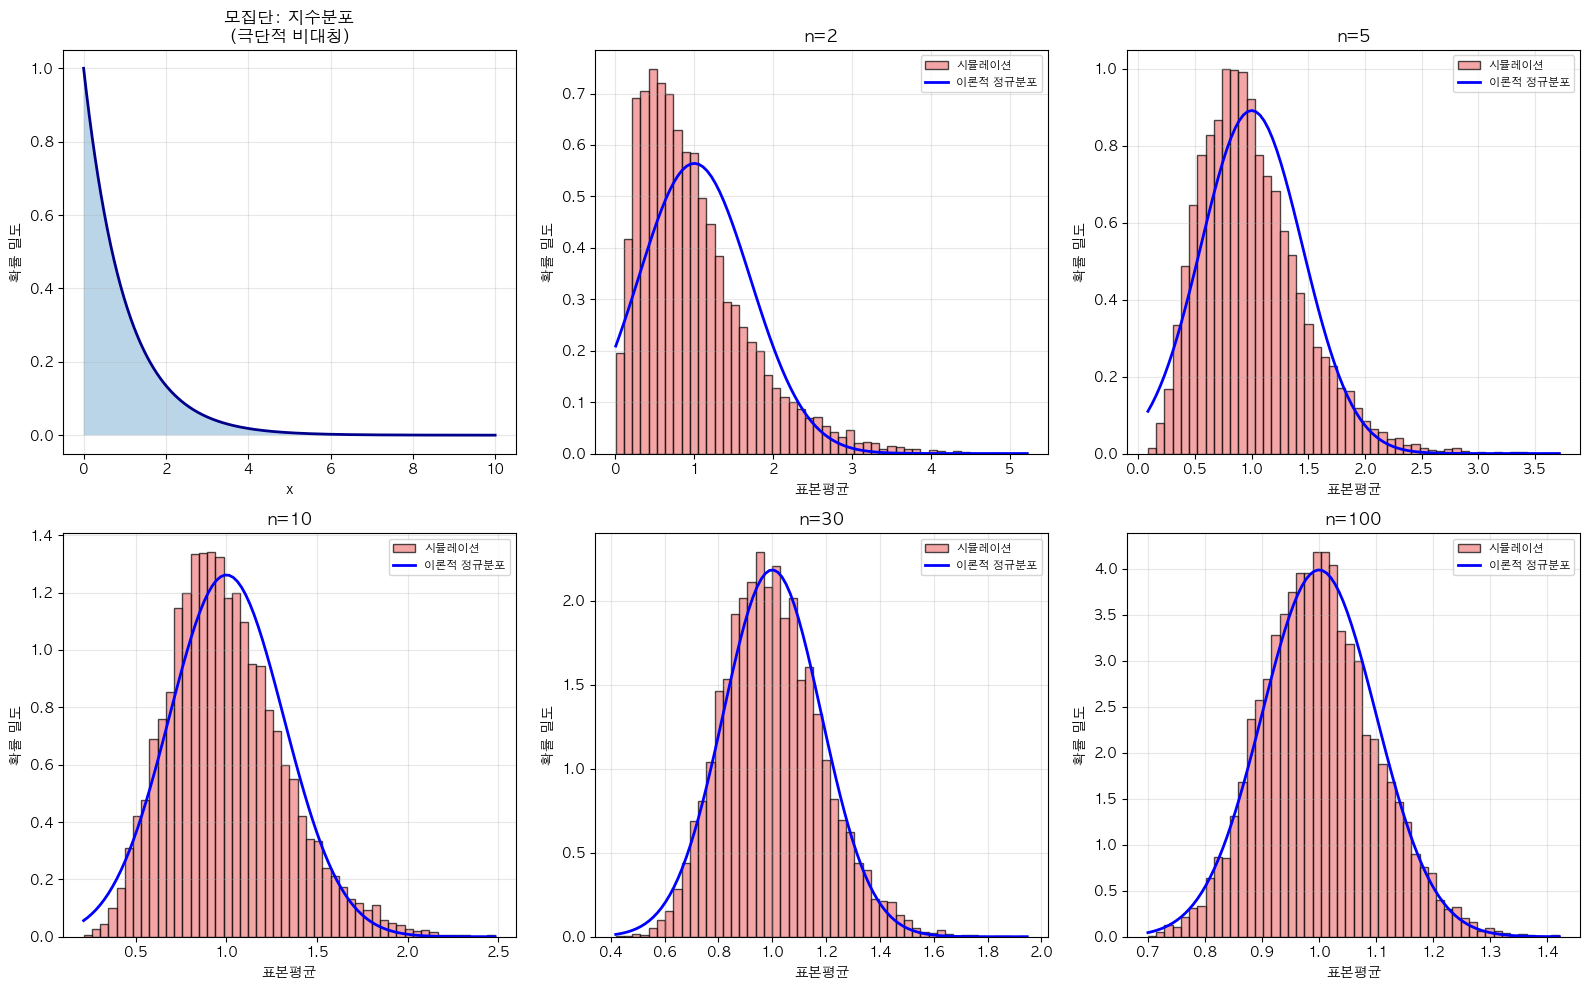

In [3]:
# 2. 중심극한정리 - 지수분포 (극단적인 비대칭 분포)
print("\n=== 중심극한정리: 지수분포 ===")

# 모집단: 지수분포
lambda_param = 1
population = stats.expon(scale=1/lambda_param)

fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# 원래 모집단 분포
ax = axes[0, 0]
x = np.linspace(0, 10, 1000)
ax.plot(x, population.pdf(x), linewidth=2, color='darkblue')
ax.fill_between(x, population.pdf(x), alpha=0.3)
ax.set_xlabel('x')
ax.set_ylabel('확률 밀도')
ax.set_title('모집단: 지수분포\n(극단적 비대칭)')
ax.grid(alpha=0.3)

# 다양한 표본 크기로 시뮬레이션
sample_sizes = [2, 5, 10, 30, 100]

for idx, n in enumerate(sample_sizes):
    ax = axes[(idx+1) // 3, (idx+1) % 3]

    sample_means = []
    for _ in range(10000):
        sample = population.rvs(size=n)
        sample_means.append(np.mean(sample))

    sample_means = np.array(sample_means)

    ax.hist(sample_means, bins=50, alpha=0.7, color='lightcoral',
            edgecolor='black', density=True, label='시뮬레이션')

    # 이론적 정규분포
    mu = 1/lambda_param
    se = mu / np.sqrt(n)

    x_range = np.linspace(sample_means.min(), sample_means.max(), 100)
    theoretical = stats.norm(mu, se).pdf(x_range)
    ax.plot(x_range, theoretical, 'b-', linewidth=2, label='이론적 정규분포')

    ax.set_xlabel('표본평균')
    ax.set_ylabel('확률 밀도')
    ax.set_title(f'n={n}')
    ax.legend(fontsize=8)
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()


=== 표준오차와 표본 크기 ===


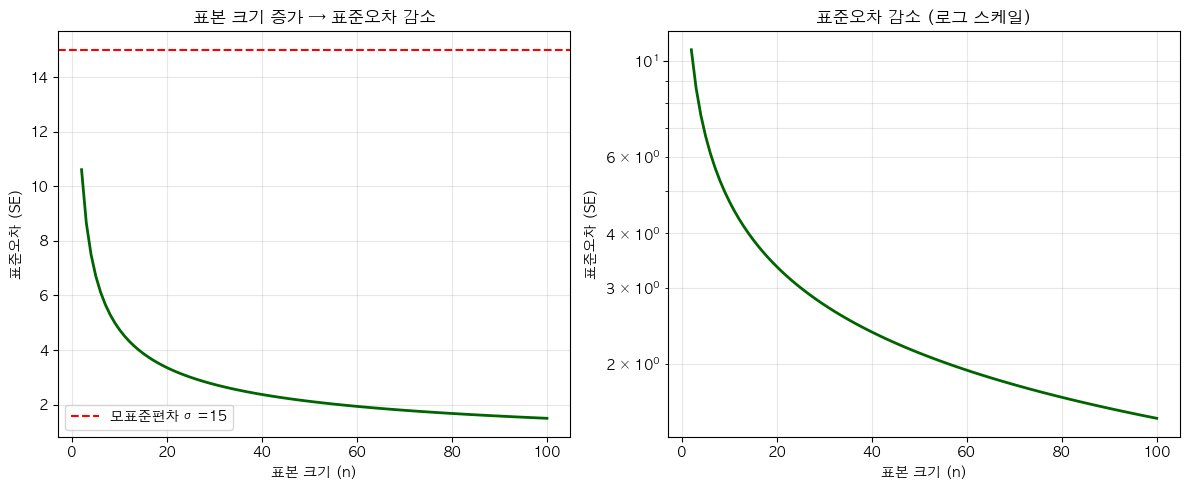

n=10일 때 표준오차: 4.74
n=100일 때 표준오차: 1.50
n=1000일 때 표준오차: 0.47


In [4]:
# 3. 표본 크기에 따른 표준오차 감소
print("\n=== 표준오차와 표본 크기 ===")

sample_sizes = range(2, 101)
standard_errors = []

mu = 50
sigma = 15

for n in sample_sizes:
    se = sigma / np.sqrt(n)
    standard_errors.append(se)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(sample_sizes, standard_errors, linewidth=2, color='darkgreen')
plt.xlabel('표본 크기 (n)')
plt.ylabel('표준오차 (SE)')
plt.title('표본 크기 증가 → 표준오차 감소')
plt.grid(alpha=0.3)
plt.axhline(sigma, color='red', linestyle='--', label=f'모표준편차 σ={sigma}')
plt.legend()

plt.subplot(1, 2, 2)
# 로그 스케일
plt.plot(sample_sizes, standard_errors, linewidth=2, color='darkgreen')
plt.xlabel('표본 크기 (n)')
plt.ylabel('표준오차 (SE)')
plt.title('표준오차 감소 (로그 스케일)')
plt.yscale('log')
plt.grid(alpha=0.3, which='both')

plt.tight_layout()
plt.show()

print(f"n=10일 때 표준오차: {sigma/np.sqrt(10):.2f}")
print(f"n=100일 때 표준오차: {sigma/np.sqrt(100):.2f}")
print(f"n=1000일 때 표준오차: {sigma/np.sqrt(1000):.2f}")


=== 실전: 평균 체류시간 추정 ===


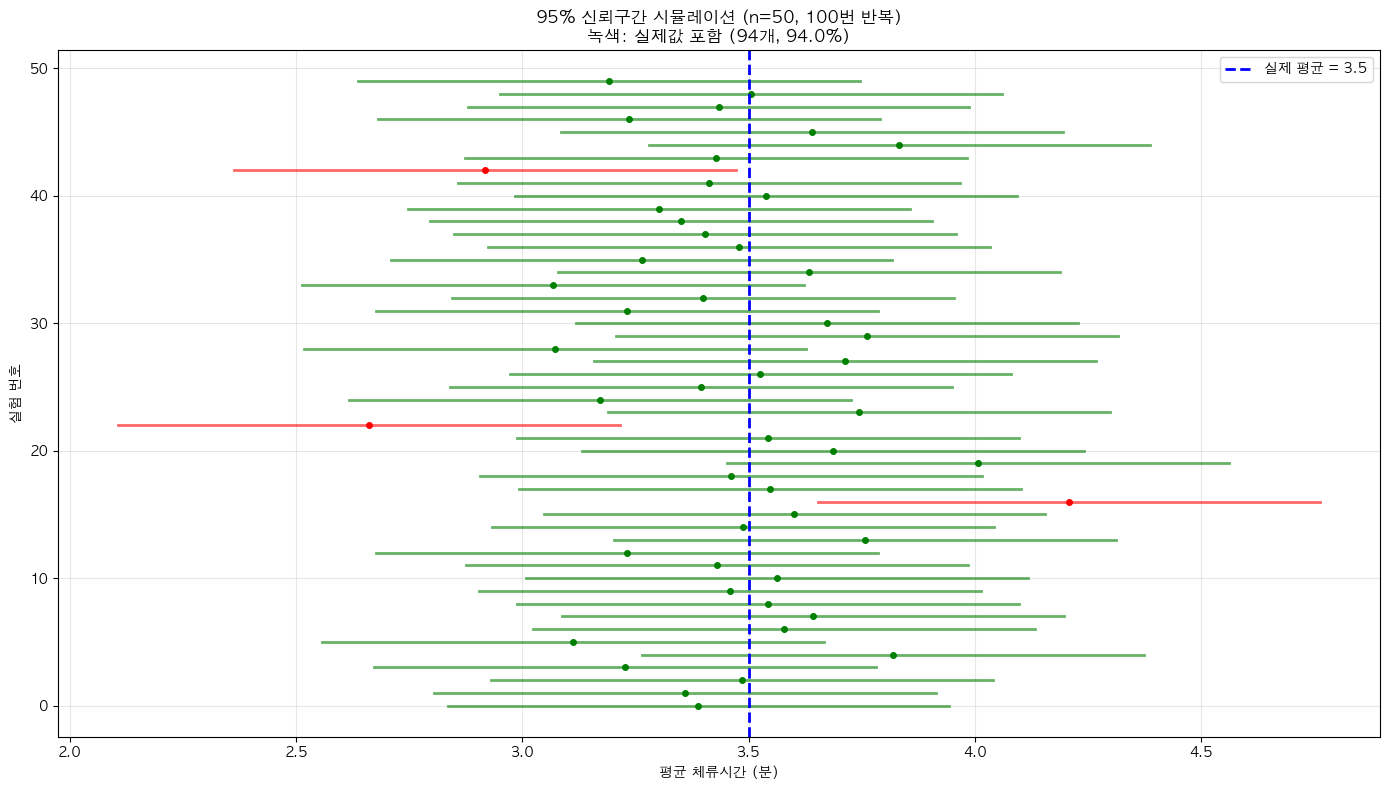


실제 평균을 포함한 신뢰구간: 94/100 (94.0%)
이론적 기댓값: 95%


In [5]:
# 4. 실전 예제: 웹사이트 평균 체류시간 추정
print("\n=== 실전: 평균 체류시간 추정 ===")

# 실제 모집단 (실무에서는 모름)
true_mean = 3.5  # 평균 3.5분
true_std = 2.0   # 표준편차 2분
population = stats.norm(true_mean, true_std)

# 여러 번 샘플링하여 신뢰구간 확인
n_samples = 50  # 50명씩 샘플링
n_experiments = 100  # 100번 반복

confidence_level = 0.95
z_critical = stats.norm.ppf((1 + confidence_level) / 2)

results = []
contains_true = []

for _ in range(n_experiments):
    sample = population.rvs(size=n_samples)
    sample_mean = np.mean(sample)
    se = true_std / np.sqrt(n_samples)  # 실무에서는 표본 표준편차 사용

    # 95% 신뢰구간
    margin_of_error = z_critical * se
    ci_lower = sample_mean - margin_of_error
    ci_upper = sample_mean + margin_of_error

    results.append((sample_mean, ci_lower, ci_upper))
    contains_true.append(ci_lower <= true_mean <= ci_upper)

# 시각화
plt.figure(figsize=(14, 8))

# 신뢰구간 그리기
for i, (mean, lower, upper) in enumerate(results[:50]):  # 처음 50개만
    color = 'green' if contains_true[i] else 'red'
    plt.plot([lower, upper], [i, i], color=color, alpha=0.6, linewidth=2)
    plt.plot(mean, i, 'o', color=color, markersize=4)

plt.axvline(true_mean, color='blue', linestyle='--', linewidth=2, label=f'실제 평균 = {true_mean}')
plt.xlabel('평균 체류시간 (분)')
plt.ylabel('실험 번호')
plt.title(f'95% 신뢰구간 시뮬레이션 (n={n_samples}, {n_experiments}번 반복)\n' +
          f'녹색: 실제값 포함 ({sum(contains_true)}개, {sum(contains_true)/len(contains_true)*100:.1f}%)')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n실제 평균을 포함한 신뢰구간: {sum(contains_true)}/{n_experiments} ({sum(contains_true)/n_experiments*100:.1f}%)")
print(f"이론적 기댓값: 95%")

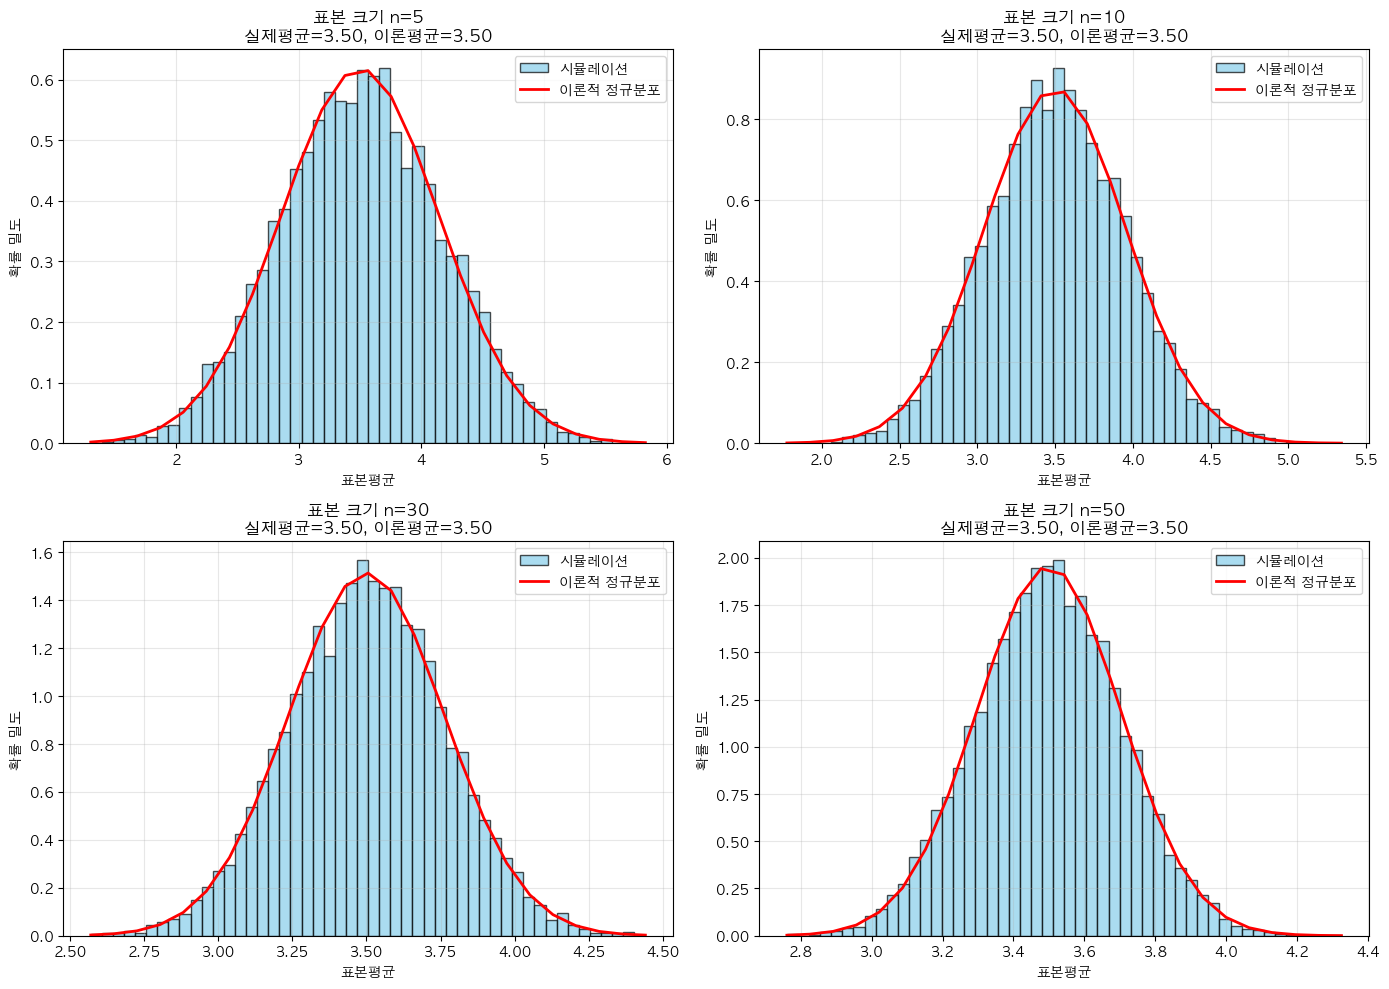

In [10]:
# 1. 주사위 눈의 평균 분포를 중심극한정리로 검증하세요. (표본 크기 5, 10, 30, 50)

# 모집단: 균등분포 U(1, 6)
population = stats.uniform(1, 5)

sample_sizes = [5, 10, 30, 50]
n_simulations = 10000

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for idx, n in enumerate(sample_sizes):
    ax = axes[idx // 2, idx % 2]

    # n개씩 샘플링하여 평균 계산을 10000번 반복
    sample_means = []
    for _ in range(n_simulations):
        # 모집단(균등분포)에서 n개의 샘플을 무작위로 추출
        sample = population.rvs(size=n)
        
        sample_means.append(np.mean(sample))

    sample_means = np.array(sample_means)

    # 히스토그램
    ax.hist(sample_means, bins=50, alpha=0.7, color='skyblue',
            edgecolor='black', density=True, label='시뮬레이션')

    # 이론적 정규분포 (중심극한정리)
    mu = 3.5  # 균등분포의 평균
    sigma = np.sqrt(25/12)  # 균등분포의 표준편차
    se = sigma / np.sqrt(n)  # 표준오차

    x = np.linspace(sample_means.min(), sample_means.max(), 25)
    theoretical = stats.norm(mu, se).pdf(x)
    ax.plot(x, theoretical, 'r-', linewidth=2, label='이론적 정규분포')

    ax.set_xlabel('표본평균')
    ax.set_ylabel('확률 밀도')
    ax.set_title(f'표본 크기 n={n}\n실제평균={sample_means.mean():.2f}, 이론평균={mu:.2f}')
    ax.legend()
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

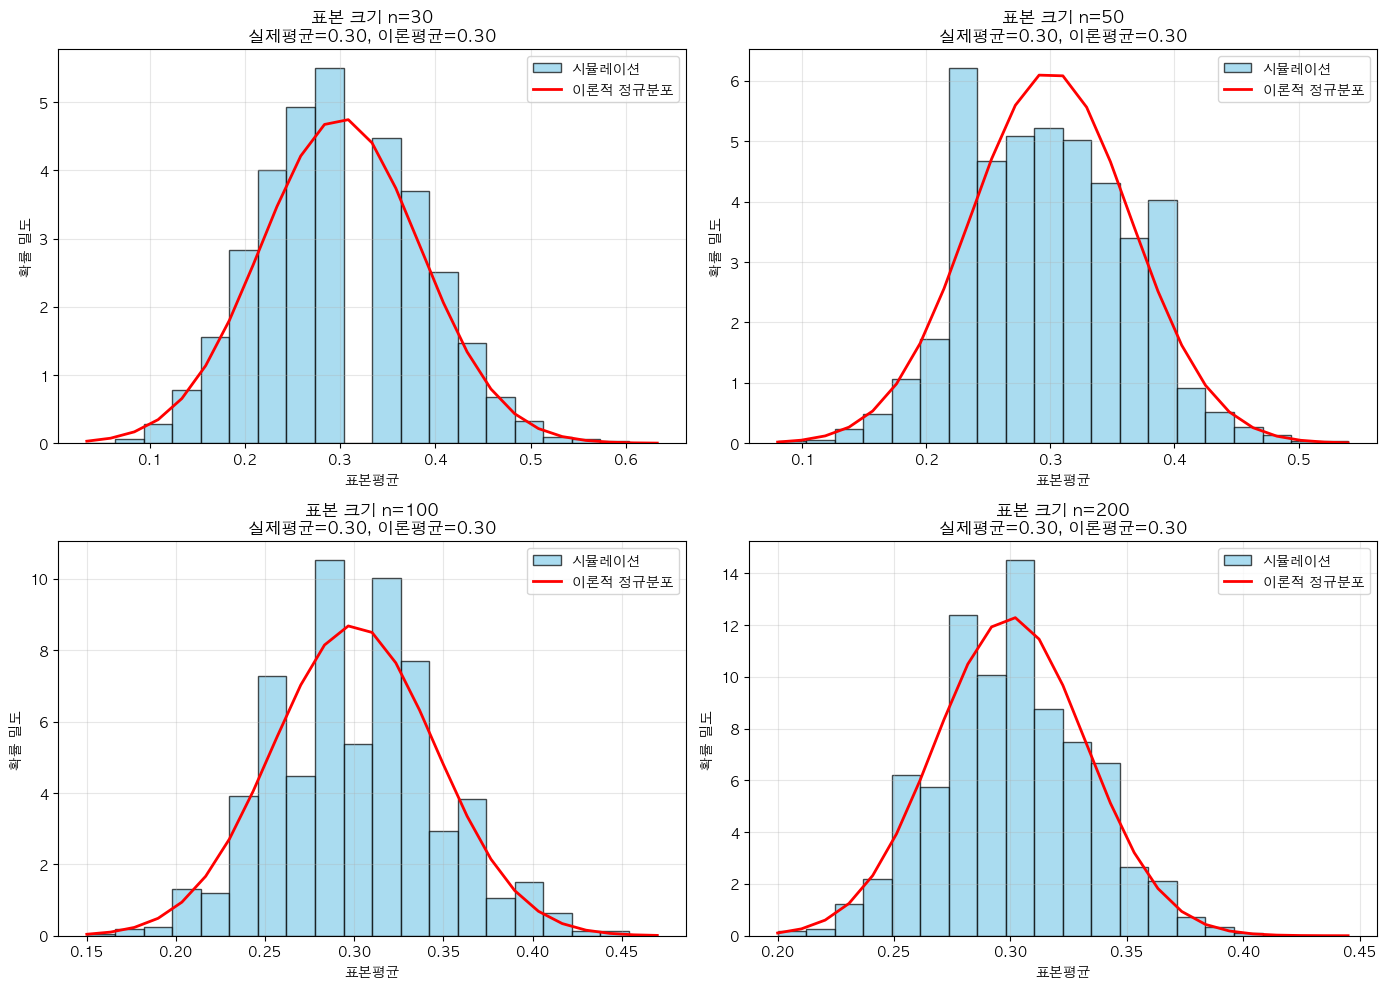

In [15]:
# 2. 이항분포 B(1, 0.3)에서 표본을 추출하여 중심극한정리를 확인하세요.

# 모집단
population = stats.binom(1, 0.3)

sample_sizes = [30, 50, 100, 200]
n_simulations = 10000

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for idx, n in enumerate(sample_sizes):
    ax = axes[idx // 2, idx % 2]

    # n개씩 샘플링하여 평균 계산을 10000번 반복
    sample_means = []
    for _ in range(n_simulations):
        # 모집단(균등분포)에서 n개의 샘플을 무작위로 추출
        sample = population.rvs(size=n)
        
        sample_means.append(np.mean(sample))

    sample_means = np.array(sample_means)

    # 히스토그램
    ax.hist(sample_means, bins=20, alpha=0.7, color='skyblue',
            edgecolor='black', density=True, label='시뮬레이션')

    # 이론적 정규분포 (중심극한정리)
    mu = 0.3  # 모집단의 평균
    sigma = np.sqrt(mu * (1 - mu))  # 모집단의 표준 편차
    se = sigma / np.sqrt(n)  # 표준오차

    x = np.linspace(sample_means.min(), sample_means.max(), 25)
    theoretical = stats.norm(mu, se).pdf(x)
    ax.plot(x, theoretical, 'r-', linewidth=2, label='이론적 정규분포')

    ax.set_xlabel('표본평균')
    ax.set_ylabel('확률 밀도')
    ax.set_title(f'표본 크기 n={n}\n실제평균={sample_means.mean():.2f}, 이론평균={mu:.2f}')
    ax.legend()
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

=== 표본 크기와 표준오차의 관계 ===

【수식】
표준오차 SE = σ / √n
표본 크기를 4배 증가: n → 4n
SE_new = σ / √(4n) = σ / (2√n) = (1/2) × (σ/√n) = SE/2
→ 표본 크기를 4배 늘리면 표준오차는 1/2배(2배 감소)

【시뮬레이션】
n=25:
  이론적 표준오차: 0.5774
  시뮬레이션 표준오차: 0.5793

n=100 (4배):
  이론적 표준오차: 0.2887
  시뮬레이션 표준오차: 0.2910

표준오차 감소 비율:
  이론적: 2.00배 감소
  시뮬레이션: 1.99배 감소


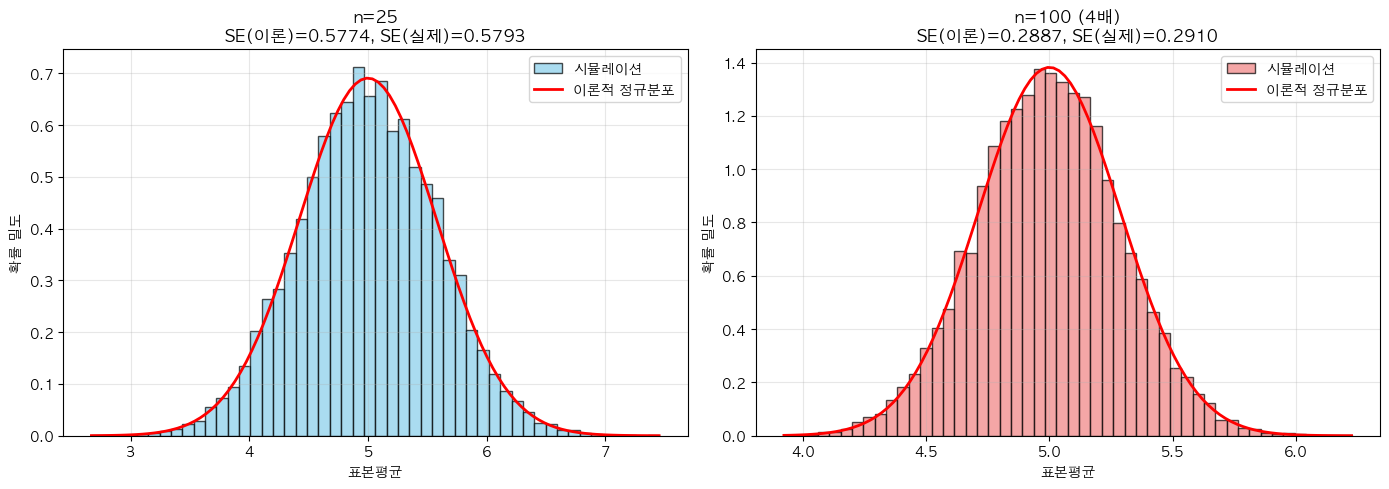


【다양한 표본 크기에서의 표준오차】


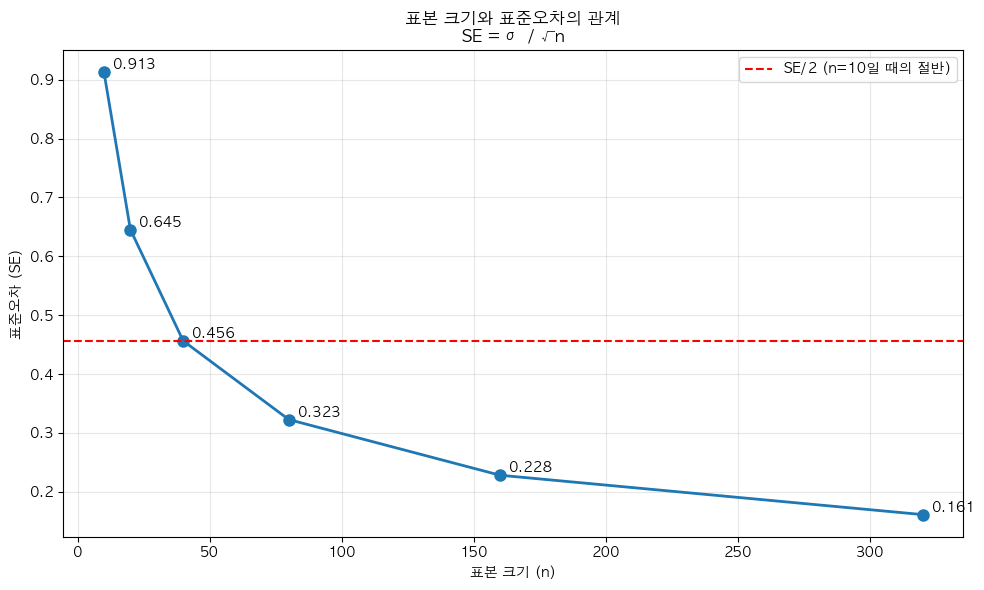

In [17]:
# 3. 표본 크기를 4배 늘리면 표준오차는 몇 배 감소하나요? 수식과 시뮬레이션으로 확인하세요.

print("=== 표본 크기와 표준오차의 관계 ===\n")

# 수식으로 확인
print("【수식】")
print("표준오차 SE = σ / √n")
print("표본 크기를 4배 증가: n → 4n")
print("SE_new = σ / √(4n) = σ / (2√n) = (1/2) × (σ/√n) = SE/2")
print("→ 표본 크기를 4배 늘리면 표준오차는 1/2배(2배 감소)\n")

# 시뮬레이션으로 확인
print("【시뮬레이션】")

# 모집단: 균등분포 U(0, 10)
population = stats.uniform(0, 10)
mu = 5  # 평균
sigma = np.sqrt(100/12)  # 표준편차

n1 = 25  # 원래 표본 크기
n2 = 100  # 4배 증가한 표본 크기
n_simulations = 10000

# n=25일 때
sample_means_25 = []
for _ in range(n_simulations):
    sample = population.rvs(size=n1)
    sample_means_25.append(np.mean(sample))
sample_means_25 = np.array(sample_means_25)

# n=100일 때
sample_means_100 = []
for _ in range(n_simulations):
    sample = population.rvs(size=n2)
    sample_means_100.append(np.mean(sample))
sample_means_100 = np.array(sample_means_100)

# 표준오차 계산
se_25_theory = sigma / np.sqrt(n1)
se_100_theory = sigma / np.sqrt(n2)
se_25_simulation = np.std(sample_means_25)
se_100_simulation = np.std(sample_means_100)

print(f"n=25:")
print(f"  이론적 표준오차: {se_25_theory:.4f}")
print(f"  시뮬레이션 표준오차: {se_25_simulation:.4f}")

print(f"\nn=100 (4배):")
print(f"  이론적 표준오차: {se_100_theory:.4f}")
print(f"  시뮬레이션 표준오차: {se_100_simulation:.4f}")

print(f"\n표준오차 감소 비율:")
print(f"  이론적: {se_25_theory/se_100_theory:.2f}배 감소")
print(f"  시뮬레이션: {se_25_simulation/se_100_simulation:.2f}배 감소")

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# n=25 그래프
ax1 = axes[0]
ax1.hist(sample_means_25, bins=50, alpha=0.7, color='skyblue',
         edgecolor='black', density=True, label='시뮬레이션')
x1 = np.linspace(sample_means_25.min(), sample_means_25.max(), 100)
theoretical1 = stats.norm(mu, se_25_theory).pdf(x1)
ax1.plot(x1, theoretical1, 'r-', linewidth=2, label='이론적 정규분포')
ax1.set_xlabel('표본평균')
ax1.set_ylabel('확률 밀도')
ax1.set_title(f'n=25\nSE(이론)={se_25_theory:.4f}, SE(실제)={se_25_simulation:.4f}')
ax1.legend()
ax1.grid(alpha=0.3)

# n=100 그래프
ax2 = axes[1]
ax2.hist(sample_means_100, bins=50, alpha=0.7, color='lightcoral',
         edgecolor='black', density=True, label='시뮬레이션')
x2 = np.linspace(sample_means_100.min(), sample_means_100.max(), 100)
theoretical2 = stats.norm(mu, se_100_theory).pdf(x2)
ax2.plot(x2, theoretical2, 'r-', linewidth=2, label='이론적 정규분포')
ax2.set_xlabel('표본평균')
ax2.set_ylabel('확률 밀도')
ax2.set_title(f'n=100 (4배)\nSE(이론)={se_100_theory:.4f}, SE(실제)={se_100_simulation:.4f}')
ax2.legend()
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# 다양한 표본 크기에 대한 표준오차 변화 시각화
print("\n【다양한 표본 크기에서의 표준오차】")
sample_sizes = [10, 20, 40, 80, 160, 320]
theoretical_se = [sigma / np.sqrt(n) for n in sample_sizes]

plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, theoretical_se, 'o-', linewidth=2, markersize=8)
plt.xlabel('표본 크기 (n)')
plt.ylabel('표준오차 (SE)')
plt.title('표본 크기와 표준오차의 관계\nSE = σ / √n')
plt.grid(alpha=0.3)
plt.axhline(y=theoretical_se[0]/2, color='r', linestyle='--', 
            label=f'SE/2 (n=10일 때의 절반)')

for i, n in enumerate(sample_sizes):
    plt.text(n, theoretical_se[i], f'  {theoretical_se[i]:.3f}', 
             verticalalignment='bottom')

plt.legend()
plt.tight_layout()
plt.show()